## DEG

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats import multitest 


In [ ]:
df_un=df = pd.read_csv('/Users/carlabatlle/Documents/practiques/data/RNAseq_un_merged.csv')
df_genes = df.drop(columns=['record_id', 'Condició'])  # Elimina la columna no numèrica
condition = df['Condició']

group_1 = df[df['SA'] == True].drop(columns=['record_id', 'SA', 'Type2', 'Condició'])
group_2 = df[df['Type2'] == True].drop(columns=['record_id', 'SA', 'Type2', 'Condició'])


log2fc = []
p_values = []

KeyError: 'SA'

In [ ]:
# Iterar sobre els gens
for gene in df_genes.columns:
    # Obtenir les dades de cada gen per als dos grups
    group_1_data = group_1[gene]
    group_2_data = group_2[gene]

    # Fer el t-test
    t_stat, p_value = stats.ttest_ind(group_1_data, group_2_data, nan_policy='omit')

    # Calcular el log2 Fold Change (log2FC)
    mean_group_1 = np.mean(group_1_data)
    mean_group_2 = np.mean(group_2_data)
    log2_fc_val = np.log2((mean_group_2 + 1) / (mean_group_1 + 1))  # +1 per evitar divisió per 0

    # Emmagatzemar els resultats
    log2fc.append(log2_fc_val)
    p_values.append(p_value)

# Crear un DataFrame amb els resultats
results_df = pd.DataFrame({
    'Gene': df_genes.columns,
    'log2FC': log2fc,
    'p_value': p_values
})

# Aplicar correcció per p-valors (ajust de Benjamini-Hochberg per controlar el FDR)
results_df['p_adj'] = multitest.fdrcorrection(results_df['p_value'])[1]

# Filtrar gens significatius (p_adj < 0.05)
significant_genes = results_df[results_df['p_adj'] < 0.05]



ValueError: All arrays must be of the same length

In [18]:
print(f"Gens significatius: {len(significant_genes)}")
print(f"Gens no significatius: {len(results_df) - len(significant_genes)}")


Gens significatius: 0
Gens no significatius: 20126


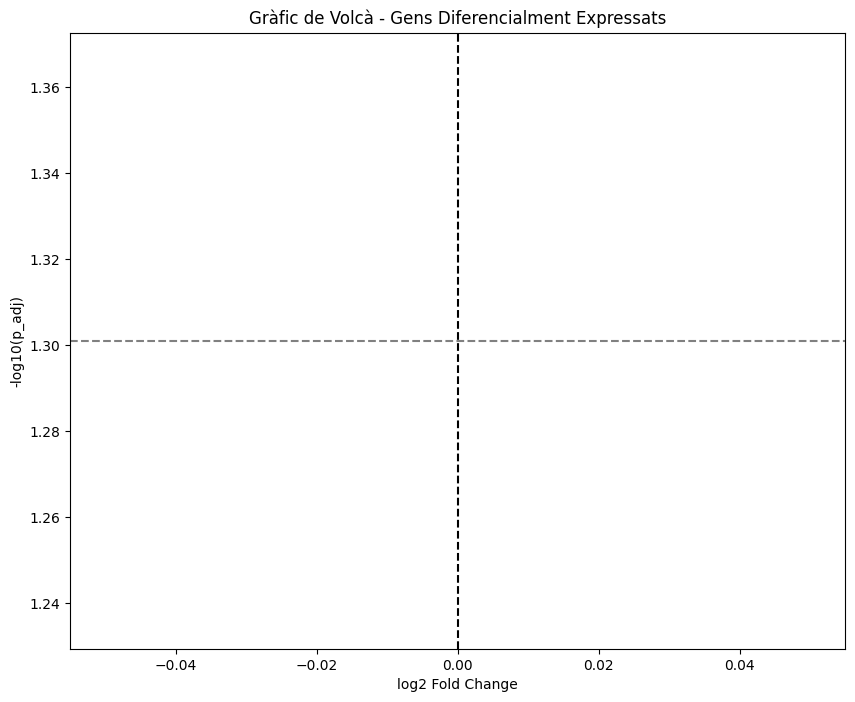

In [ ]:
# Volcanoplot
plt.figure(figsize=(10, 8))
plt.scatter(results_df['log2FC'], -np.log10(results_df['p_adj']), c='blue', alpha=0.7)
plt.scatter(significant_genes['log2FC'], -np.log10(significant_genes['p_adj']), c='red', alpha=0.7)
plt.title("Volcanoplot - DEG - SA vs Type2")
plt.xlabel("log2 Fold Change")
plt.ylabel("-log10(p_adj)")
plt.axhline(y=-np.log10(0.05), color='grey', linestyle='--')  # Línia de significació
plt.axvline(x=0, color='black', linestyle='--')
plt.show()